**Корректность проверена на Python 3.6:**
+ matplotlib 3.0.2
+ sklearn 0.20.2

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [2]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [4]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [5]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

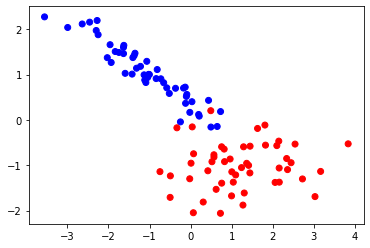

In [6]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)

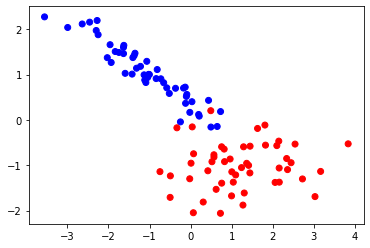

In [7]:
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)

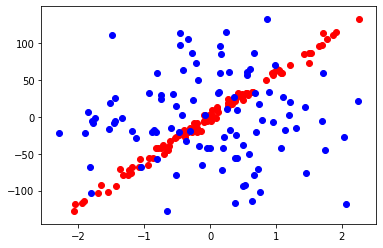

In [8]:
pylab.scatter(reg_data[:,1], reg_target, color = 'r')
pylab.scatter(reg_data[:,0], reg_target, color = 'b')

In [9]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [10]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [11]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000)

In [12]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
predictions = classifier.predict(clf_test_data)

In [14]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [15]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [16]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]


In [17]:
print(probability_predictions)

[[0.00000000e+00 1.00000000e+00]
 [9.99999997e-01 2.90779994e-09]
 [9.99990982e-01 9.01818055e-06]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.01333183e-14]
 [5.16838702e-07 9.99999483e-01]
 [6.66133815e-16 1.00000000e+00]
 [1.00000000e+00 6.21822808e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999998e-01 2.30155106e-09]
 [9.99999697e-01 3.03286910e-07]
 [4.06373790e-03 9.95936262e-01]
 [0.00000000e+00 1.00000000e+00]
 [9.84496051e-09 9.99999990e-01]
 [1.00000000e+00 2.85780656e-10]
 [9.96681204e-01 3.31879568e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 6.58409203e-15]
 [1.00000000e+00 1.62031980e-14]
 [7.25799421e-11 1.00000000e+00]
 [9.99999999e-01 1.11892650e-09]
 [9.99999727e-01 2.73211585e-07]
 [8.97506031e-01 1.02493969e-01]
 [1.00000000e+00 1.48816090e-12]
 [9.99999504e-01 4.96472653e-07]
 [9.94751478e-01 5.24852191e-03]
 [5.83291617e-01 4.16708383e-01]
 [8.46989145e-12 1.00000000e+00]
 [3.20094202e-02 9.67990580e-01]
 [1.00000000e+00 2.85626467e-13]]


#### accuracy

In [18]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

In [19]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

#### confusion matrix

In [20]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 1 11]]


In [21]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

28

In [22]:
matrix.diagonal().sum()

28

#### precision 

In [23]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [24]:
metrics.precision_score(clf_test_labels, predictions)

0.9166666666666666

#### recall

In [25]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [27]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

In [28]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9714285714285714

In [29]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

#### classification report

In [30]:
print(metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### ROC curve

In [31]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

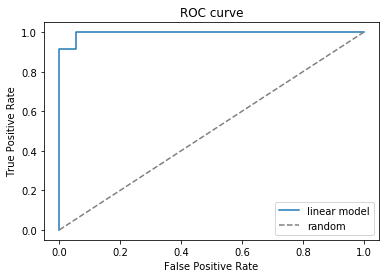

In [32]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [33]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [34]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9953703703703703

#### PR AUC

In [35]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

#### log_loss

In [36]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.0799522288701126

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [37]:
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 20)

In [48]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=20,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=1, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [39]:
reg_predictions = regressor.predict(reg_test_data)

In [40]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [41]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### mean absolute error

In [42]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### mean squared error

In [43]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### root mean squared error

In [44]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

#### r2 score

In [45]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695